In [ ]:
# Exploratory Data Analysis (EDA) – Predictive Maintenance

## Objective
The goal of this notebook is to explore and understand the machine sensor dataset used for predictive maintenance. 
We aim to identify data quality issues, understand feature distributions, and analyze the target variable before building a machine learning model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## Dataset Loading

In this step, the dataset containing historical machine sensor readings and operational parameters is loaded into the environment for analysis.


In [6]:
df = pd.read_csv("../data/raw/predictive_maintenance.csv")




In [ ]:
## Initial Data Inspection

We begin by inspecting the dataset structure to understand:
- The available features
- Data types of each column
- Presence of missing or invalid values
- Overall data consistency


In [7]:
df.head()



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [8]:
df.shape


(10000, 14)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [10]:
df.isnull().sum()


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
### Missing Values

The dataset contains no missing values. All features have zero null entries, 
so no imputation or removal of rows is required at this stage.


In [11]:
df.duplicated().sum()


np.int64(0)

In [12]:
df.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
## Target Variable: Machine Failure

The target variable for this project is **Machine failure**, which indicates whether a failure occurred during machine operation.
This is a binary classification problem:
- 0 → No failure
- 1 → Failure


In [13]:
df["Machine failure"].value_counts()


Machine failure
0    9661
1     339
Name: count, dtype: int64

In [ ]:
### Observation

The dataset is highly imbalanced, with failures occurring in only a small percentage of observations.
This reflects real-world industrial scenarios and highlights the importance of careful model evaluation beyond accuracy alone.


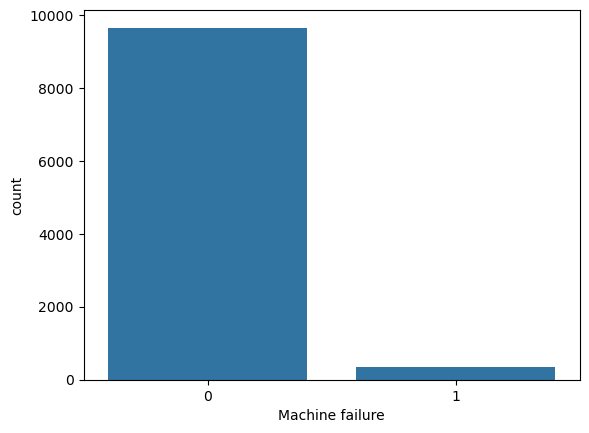

In [14]:
sns.countplot(x="Machine failure", data=df)
plt.show()


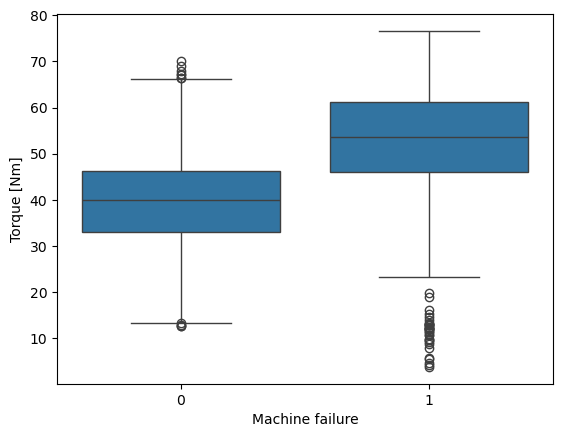

In [15]:
sns.boxplot(x="Machine failure", y="Torque [Nm]", data=df)
plt.show()


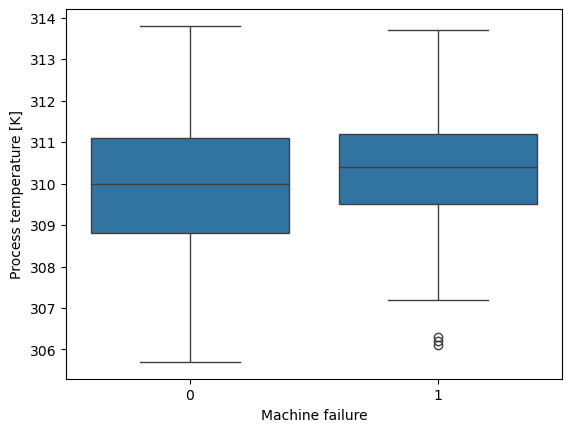

In [16]:
sns.boxplot(x="Machine failure", y="Process temperature [K]", data=df)
plt.show()


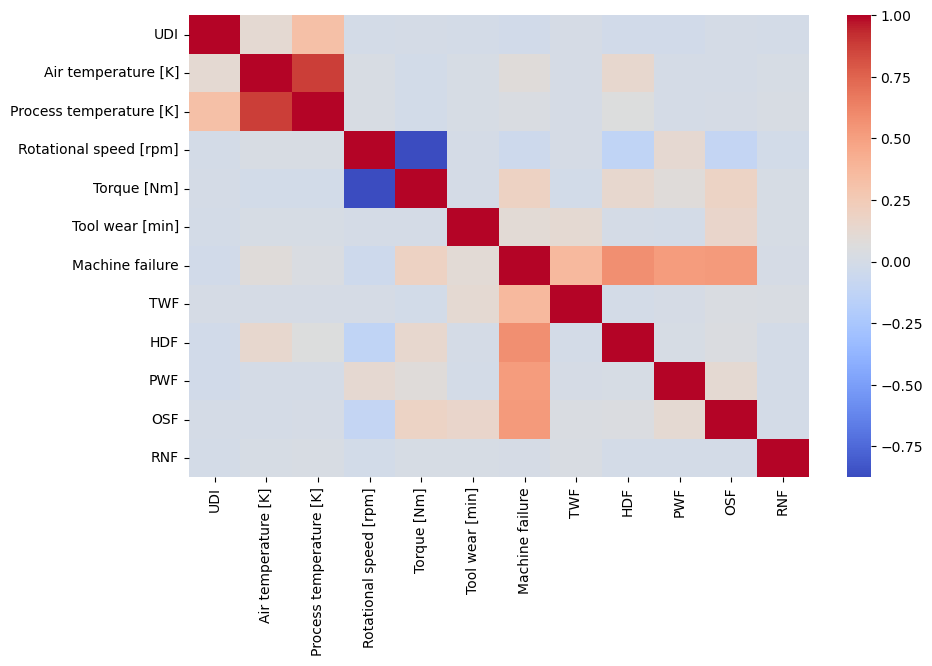

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include="number").corr(), cmap="coolwarm")
plt.show()




In [20]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols


Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

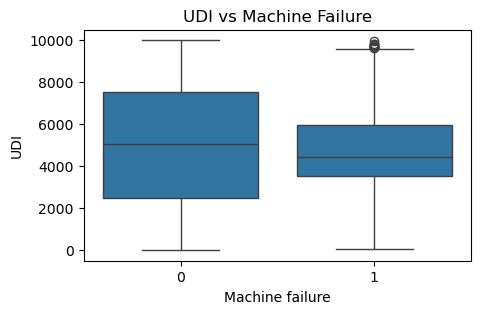

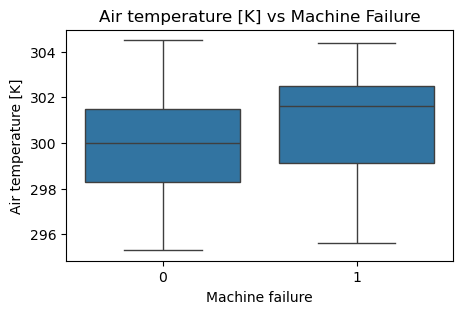

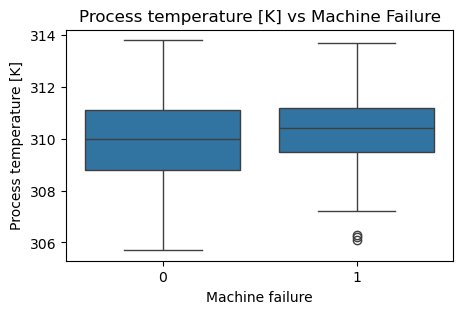

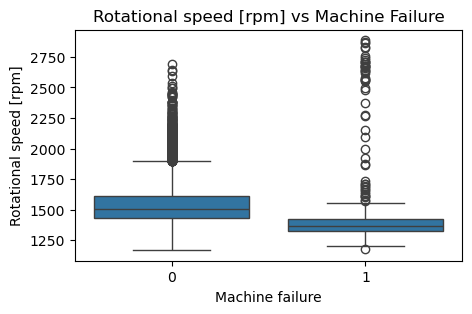

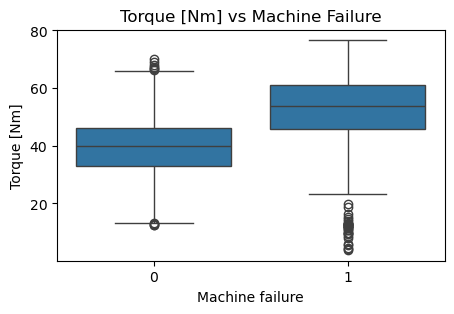

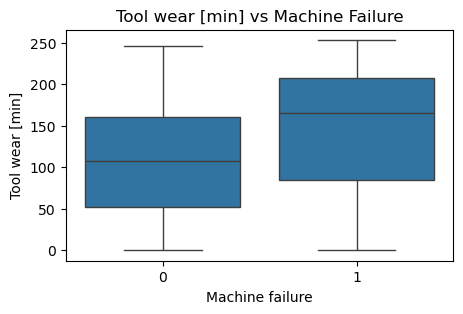

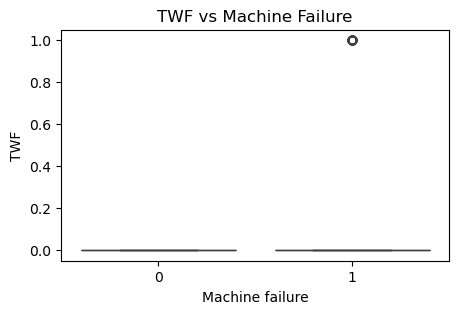

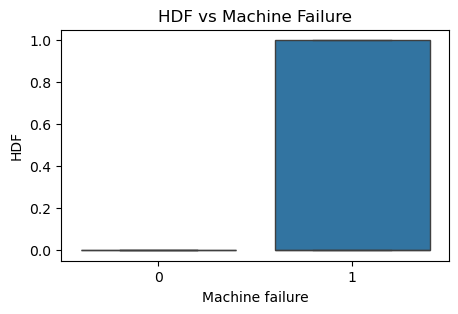

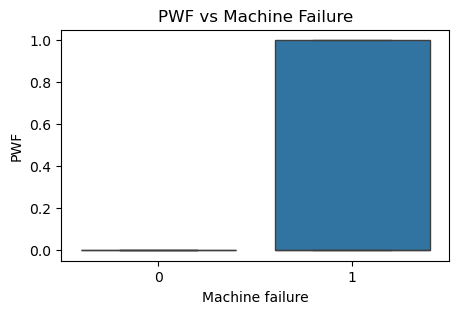

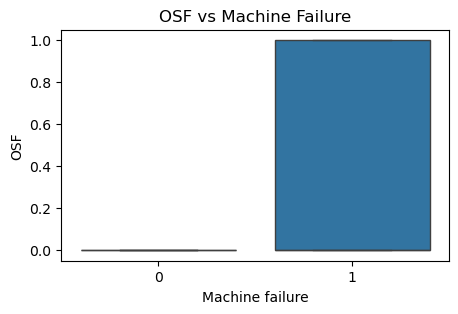

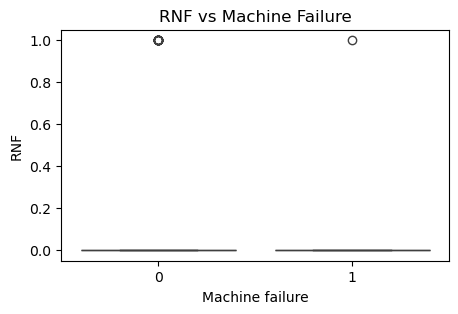

In [21]:
for col in numeric_cols:
    if col != "Machine failure":
        plt.figure(figsize=(5,3))
        sns.boxplot(x="Machine failure", y=col, data=df)
        plt.title(f"{col} vs Machine Failure")
        plt.show()


In [28]:

df["Machine failure"].value_counts()





Machine failure
0    9661
1     339
Name: count, dtype: int64

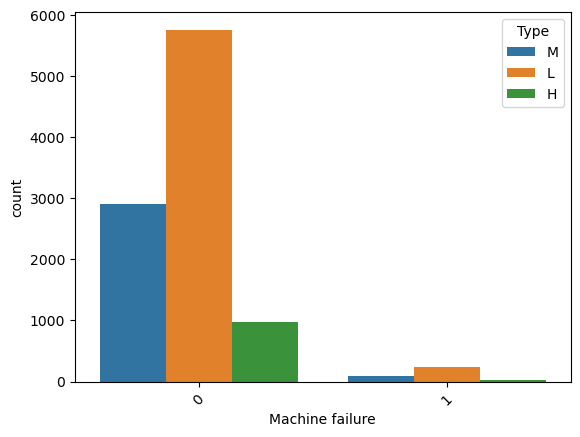

In [30]:
sns.countplot(x="Machine failure", hue="Type", data=df)
plt.xticks(rotation=45)
plt.show()


In [31]:
failure_ratio = df["Machine failure"].value_counts(normalize=True)
failure_ratio


Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

In [ ]:
## Final EDA Summary

- Dataset contains X observations and Y features.
- No missing or duplicated values detected, indicating high data quality.
- Machine failures are rare, confirming strong class imbalance.
- Torque, rotational speed, and temperature show noticeable behavioral differences during failures.
- Certain failure types appear more frequently for specific machine types.
- Findings support framing this as a supervised classification problem.


In [32]:
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']


In [33]:
X = X.drop(['UDI', 'Product ID'], axis=1)


In [34]:
X = pd.get_dummies(X, columns=['Type'], drop_first=True)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
y_pred = model.predict(X_test)


In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.999

In [40]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[1939    0]
 [   2   59]]


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [42]:
y_prob = model.predict_proba(X_test)


In [46]:
failure_prob = y_prob[:, 1]





In [47]:
failure_prob


array([8.94911898e-04, 1.50978539e-03, 1.34644949e-03, ...,
       1.13261619e-03, 9.95715272e-01, 1.69662979e-03], shape=(2000,))

failure_prob.min(), failure_prob.max()
